# Machine Vision
## Assignment 7 - Hough transform

## Personal details

* **Name(s):** `PUT YOUR NAME(S) HERE.`
* **Student ID(s):** `PUT YOUR STUDENT ID(S) HERE.`

## Introduction

In this assignment, we will use the Hough transform to detect circles in images. Specifically, we aim to extract 10-cent coins, as shown in Figure 1. The Hough transform consists of four basic steps: detecting edge pixels, building accumulator, filtering the accumulator, and extracting objects. We will implement these steps in the following sections.

Refer to the __[`lecture notes`](https://moodle.oulu.fi/mod/page/view.php?id=1705517)__ for more details on the Hough transform.  

![hough_steps.jpg](attachment:hough_steps.jpg)

## Task 1 - Detect edge pixels (0.5 points)

Implement the first step of the Hough transform by extracting edge pixels using the Canny edge detector. The goal is to detect only the edges of the 10-cent coins, similar to Figure 1.

### Instructions
- Use [`cv2.Canny`](https://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html) to extract edges from the image.
- Name the output **`edges`** and visualize the result.
- Experiment with different Canny parameters and select the ones that you think work best.
- Refer to the sample code in [`2DModels.ipynb`](https://github.com/jtheikkila/mvis/blob/master/jupyter/2DModels.ipynb) for guidance on using the Canny edge detector.


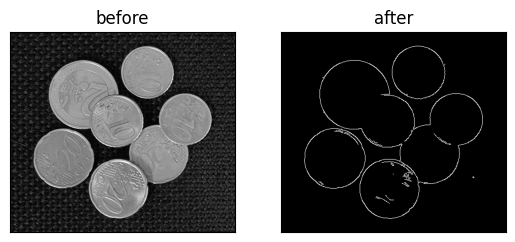

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('coins.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ---------- YOUR CODE STARTS HERE -----------
edges = cv2.Canny(img, 250, 650)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('before'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap = 'gray')
plt.title('after'), plt.xticks([]), plt.yticks([])
plt.show()

# ----------- YOUR CODE ENDS HERE ------------

In [ ]:
# LEAVE EMPTY

## Hough parameter space

A circle has three parameters: the radius $d$, the row-coordinate of the center $r_0$ and the column-coordinate of the center $c_0$. Circles are represented by the equations:

$$
r = r_0 + d \, \text{sin} \theta \qquad \qquad (1)
$$
$$
c = c_0 + d \, \text{cos} \theta \qquad \qquad (2)
$$

Let us first consider the case when radius $d$ is fixed. In this case, we only need to find the center of the circle:

$$
r_0 = r - d \, \text{sin} \theta \qquad \qquad (3)
$$
$$
c_0 = c - d \, \text{cos} \theta \qquad \qquad (4)
$$

In the previous section, we detected edge pixels that hopefully belong to a circle. Let $(c, r)$ be one of those edge points. By varying $\theta$ from $0$ to $2\pi$ we can compute all possible circles $(c_0, r_0)$ that this point may belong. The following code illustrates this given three points. In this case, each of the points actually belongs to the same circle. Run the code and observe how each point generates a circle to the Hough parameter space.

Text(0.5, 1.0, 'Hough space (accumulator A)')

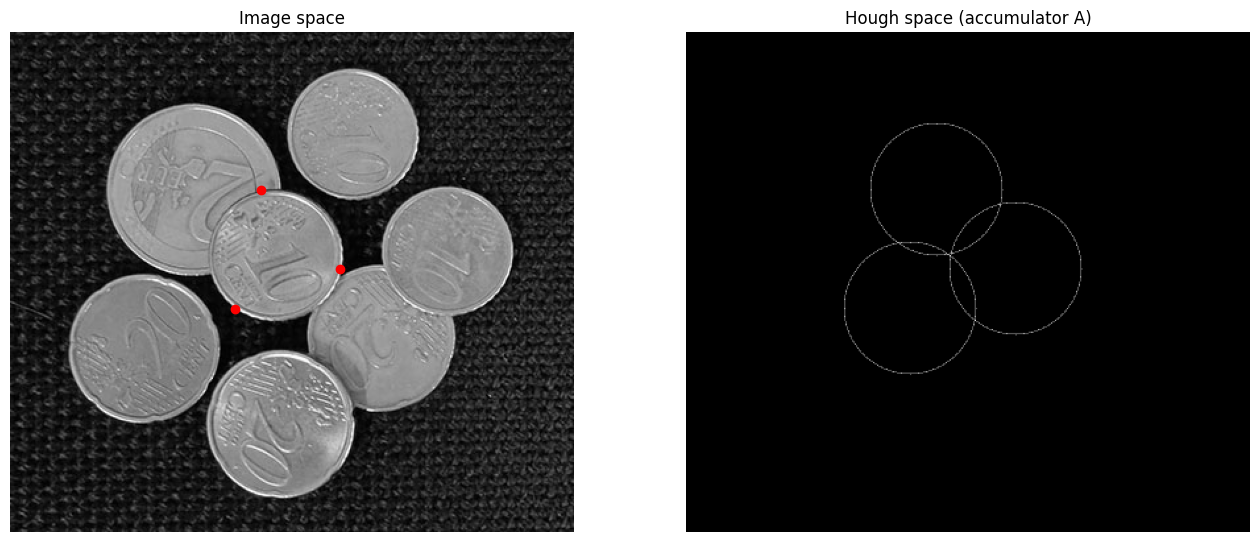

In [30]:
d = 50 # Radius is fixed (10 cent coin)

# Three points that belong to a circle
pts = np.array([[170, 210],  # Point 1
                [190, 120],  # Point 2
                [250, 180]]) # Point 3

# Initialize accumulator
height, width = img.shape
A = np.zeros((height, width), dtype=np.float_)

# Theta goes from 0 to 2*pi
thetas = np.linspace(0, 2*np.pi, 360, endpoint=False)

for c, r in pts:
    for theta in thetas:
        # Compute circle center coordinates
        r0 = int(r - d * np.sin(theta))  # Eq. 3
        c0 = int(c - d * np.cos(theta))  # Eq. 4

        # Accumulate votes while ensuring indices are within bounds
        if 0 <= r0 < height and 0 <= c0 < width:
            A[r0, c0] += 1

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.plot(pts[:,0], pts[:,1], 'ro')
plt.axis('off')
plt.title('Image space')
plt.subplot(122)
plt.imshow(A, cmap='gray')
plt.axis('off')
plt.title('Hough space (accumulator A)')

Take a look at the accumulator `A` that was generated from the three points. Notice that all circles intersect at the same point (more or less). This point will have the most votes in the accumulator. If we extract the coordinates of that point, we find the most voted circle. The following code extracts the most voted circle.

Text(0.5, 1.0, 'A circle with most votes')

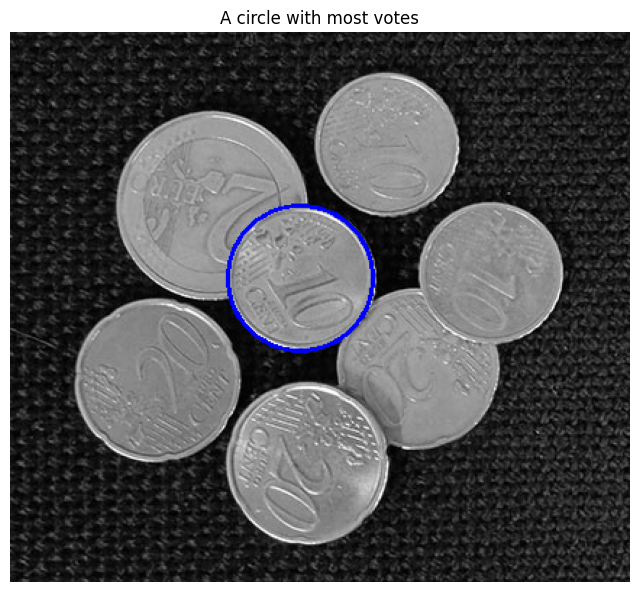

In [31]:
# Find a circle that has most votes
idx = np.argsort(-A, axis=None) # Descending order: -A
r0, c0 = np.unravel_index(idx, A.shape)

# Use OpenCV to draw the first circle
circles = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.circle(circles, (c0[0],r0[0]), d, (0,0,255), 2)

plt.figure(figsize=(8,8))
plt.imshow(circles, cmap='gray')
plt.axis('off')
plt.title('A circle with most votes')

## Task 2 - Hough accumulator (0.5 points)

Build the Hough accumulator using the edge points detected in Task 1. This step will accumulate votes for potential circle centers based on the detected edges. Use the sample code above as a reference — only minor modifications are needed.

### Instructions
- Initialize a new accumulator
- Extract row and column coordinates of edge points using **[`cv2.findNonZero`](https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html#find-non-zero-pixels)**. See the sample code __[`2DModels.ipynb`](https://github.com/jtheikkila/mvis/blob/master/jupyter/2DModels.ipynb)__.
- Accumulate votes for potential circle centers.
- Display the accumulator. It should resemble the Hough accumulator in Figure 1.

Text(0.5, 1.0, 'Hough space (accumulator A)')

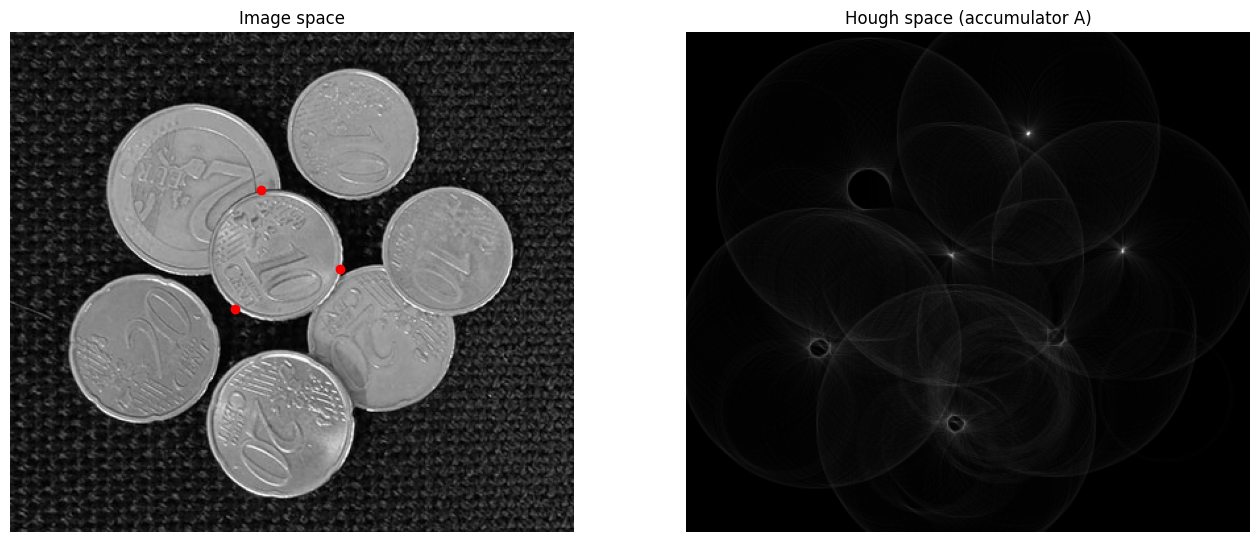

In [47]:
# ---------- YOUR CODE STARTS HERE -----------
height, width = img.shape
new_A = np.zeros((height, width), dtype=np.float_)

edge_pts = cv2.findNonZero(edges)
edge_pts = edge_pts.reshape(-1, 2)

thetas = np.linspace(0, 2*np.pi, 360, endpoint=False)

for c, r in edge_pts:
    for theta in thetas:
        r0 = int(r - d * np.sin(theta))  # Eq. 3
        c0 = int(c - d * np.cos(theta))  # Eq. 4

        if 0 <= r0 < height and 0 <= c0 < width:
            new_A[r0, c0] += 1

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.plot(pts[:,0], pts[:,1], 'ro')
plt.axis('off')
plt.title('Image space')
plt.subplot(122)
plt.imshow(new_A, cmap='gray')
plt.axis('off')
plt.title('Hough space (accumulator A)')

# ----------- YOUR CODE ENDS HERE ------------

## Task 3 - Extract circles (0.5 points)

Complete the following code cell. Extract 3 most voted circles from the accumulator you build in Task 2. The sample code shown earlier will help you complete this task. Use different colors when drawing the circles. You will notice that two of the circles are pretty much the same but slightly shifted.

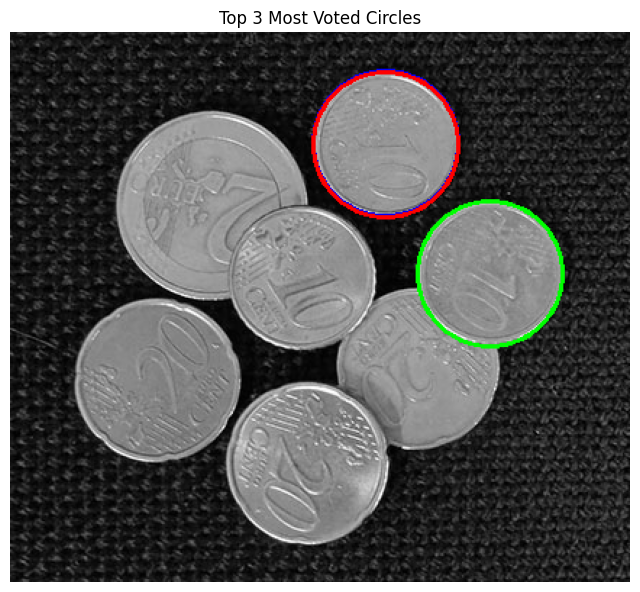

In [53]:
# ---------- YOUR CODE STARTS HERE -----------

idx = np.argsort(-new_A, axis=None)
r, c = np.unravel_index(idx[:3], new_A.shape)

circles = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.circle(circles, (c[0], r[0]), d, (0, 0, 255), 2)
cv2.circle(circles, (c[1], r[1]), d, (0, 255, 0), 2)
cv2.circle(circles, (c[2], r[2]), d, (255, 0, 0), 2)

# Display the result
plt.figure(figsize=(8, 8))
plt.imshow(circles)
plt.axis('off')
plt.title('Top 3 Most Voted Circles')
plt.show()

# ----------- YOUR CODE ENDS HERE ------------

## Task 4 - Filter the accumulator (0.5 points)

The accumulator from Task 2 contains neighboring bins with high votes, leading to duplicate detections. Apply non-maxima suppression (NMS) to refine the accumulator and remove redundant peaks. Use the provided `nms()` function to produce a filtered accumulator.

### Instructions
- Apply non-maxima suppression using the function `nms()`.
- Display the filtered accumulator to visualize the effect of suppression.
- Extract the three most voted circles from the filtered accumulator, just as in Task 3.
- The final result should successfully detect each 10-cent coin as shown in Figure 1.


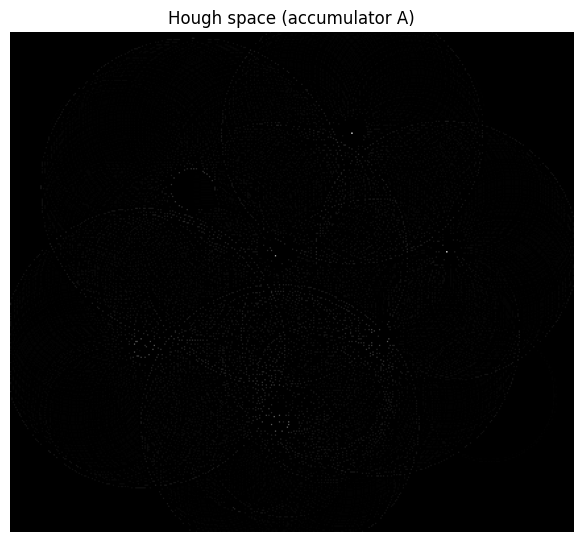

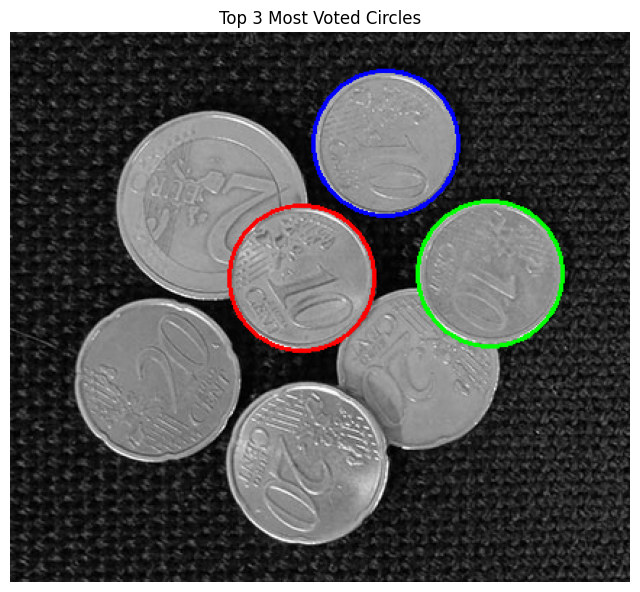

In [57]:
# Non-maxima suppression. This simple approach
# works in this case. Values that are not local maxima
# are set to zero.
def nms(accum):
    accum_filt = accum.copy()
    mi = accum.min()
    dil = cv2.dilate(accum_filt, None)
    accum_filt[accum_filt < dil] = mi
    return(accum_filt)

# ---------- YOUR CODE STARTS HERE -----------

new_A_filt = nms(new_A)

plt.figure(figsize=(16,8))
plt.subplot(122)
plt.imshow(new_A_filt, cmap='gray')
plt.axis('off')
plt.title('Hough space (accumulator A)')

idx = np.argsort(-new_A_filt, axis=None)
r, c = np.unravel_index(idx[:3], new_A_filt.shape)

circles = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.circle(circles, (c[0], r[0]), d, (0, 0, 255), 2)
cv2.circle(circles, (c[1], r[1]), d, (0, 255, 0), 2)
cv2.circle(circles, (c[2], r[2]), d, (255, 0, 0), 2)

plt.figure(figsize=(8, 8))
plt.imshow(circles)
plt.axis('off')
plt.title('Top 3 Most Voted Circles')
plt.show()

# ----------- YOUR CODE ENDS HERE ------------

## Finding circles with unknown radius

It is also possible to find circles with unknown radius by using a three dimensional accumulation matrix. We could specify a range of radius values (e.g. $d = [1,200]$ pixels). When building the accumulator, we could loop through all possible radius values. The maximum value in the 3D accumulator would correspond to the most voted circle. A direct implementation of such approach would be very slow. Let us use the OpenCV implementation instead to find all coins from the image.

Text(0.5, 1.0, 'OpenCV (HoughCircles)')

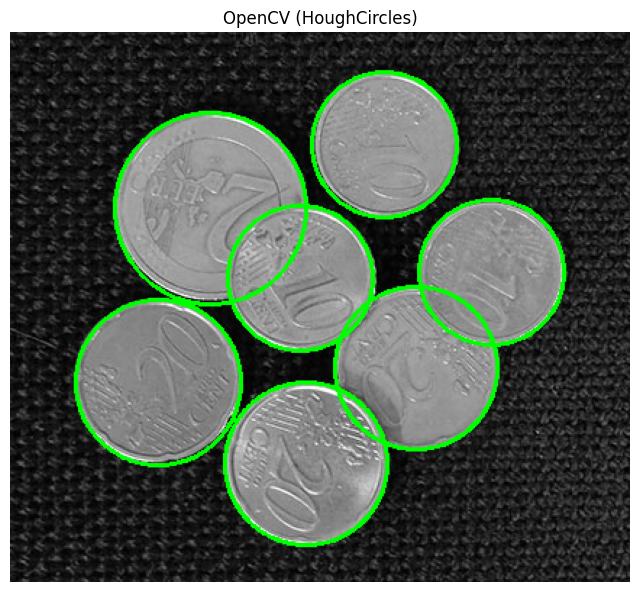

In [58]:
filtered = cv2.medianBlur(img, 5)
circles = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

C = cv2.HoughCircles(filtered, cv2.HOUGH_GRADIENT, 1, 30,
                     param1=400, param2=30, minRadius=1, maxRadius=200)
C = np.uint16(np.around(C))

# Draw circles with most votes
for i in C[0,:]:
    cv2.circle(circles, (i[0],i[1]), i[2], (0,255,0), 2)

plt.figure(figsize=(8,8))
plt.imshow(circles)
plt.axis('off')
plt.title('OpenCV (HoughCircles)')

# Aftermath

Please provide short answers to the following questions:

**1. How much time did you need to complete this exercise?**

`REPLACE THIS TEXT WITH YOUR ANSWER.`

**2. Did you experience any issues or find anything particularly confusing?**

`REPLACE THIS TEXT WITH YOUR ANSWER.`


# References
`LIST YOUR POSSIBLE REFERENCES HERE!`

# Submission

1. Go to `Kernel -> Restart & Clear Output` to remove all outputs.
2. Compress this notebook (`MV_A7.ipynb`) into `MV_A7.zip`.
3. Submit the **zip** file on Moodle.

**Deadline: 2.3.2025**